In [17]:
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [18]:
df = pd.read_excel('electroV.xlsx')

In [19]:
df_binary = df[['category', 'price', 'user_type']]

df_binary.columns = ['category', 'price', 'user type']

df_binary.head()

,category,price,user type
0,TOYS,1200,medium
1,AGD,1200,advanced
2,AGD,1000,advanced
3,AGD,500,medium
4,AGD,200,weak


In [20]:
df_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   50 non-null     object
 1   price      50 non-null     int64 
 2   user type  50 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [21]:
df_binary.describe().T

,count,mean,std,min,25%,50%,75%,max
price,50.0,1330.86,1435.4406,1.0,134.0,944.0,1942.5,6000.0


In [22]:
df_binary['category'] = df_binary['category'].replace('TOYS', 1).replace('AGD', 2)

df_binary.describe().T

,count,mean,std,min,25%,50%,75%,max
category,50.0,1.44,0.501427,1.0,1.0,1.0,2.0,2.0
price,50.0,1330.86,1435.440600,1.0,134.0,944.0,1942.5,6000.0


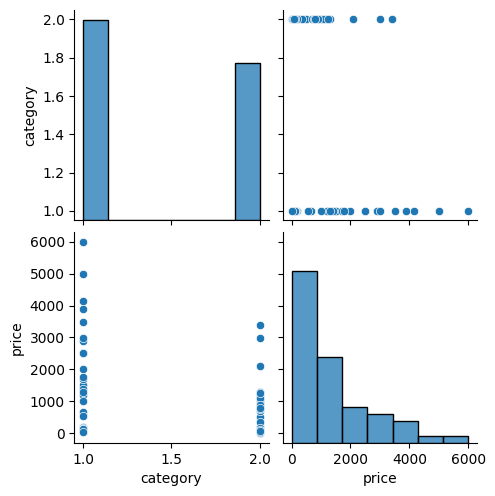

In [23]:
sns.pairplot(df_binary)

In [24]:
X = df_binary[['category','price']]

y = df_binary['user type']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10, shuffle=True)

In [26]:
classifier = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=10)
classifier.fit(X_train.values, y_train)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=10)

In [27]:
print(classifier.predict([[2,1800]]))

['medium']


In [28]:
y_pred = classifier.predict(X_test.values)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print(classifier.score(X.values,y))

Accuracy: 0.900
0.88


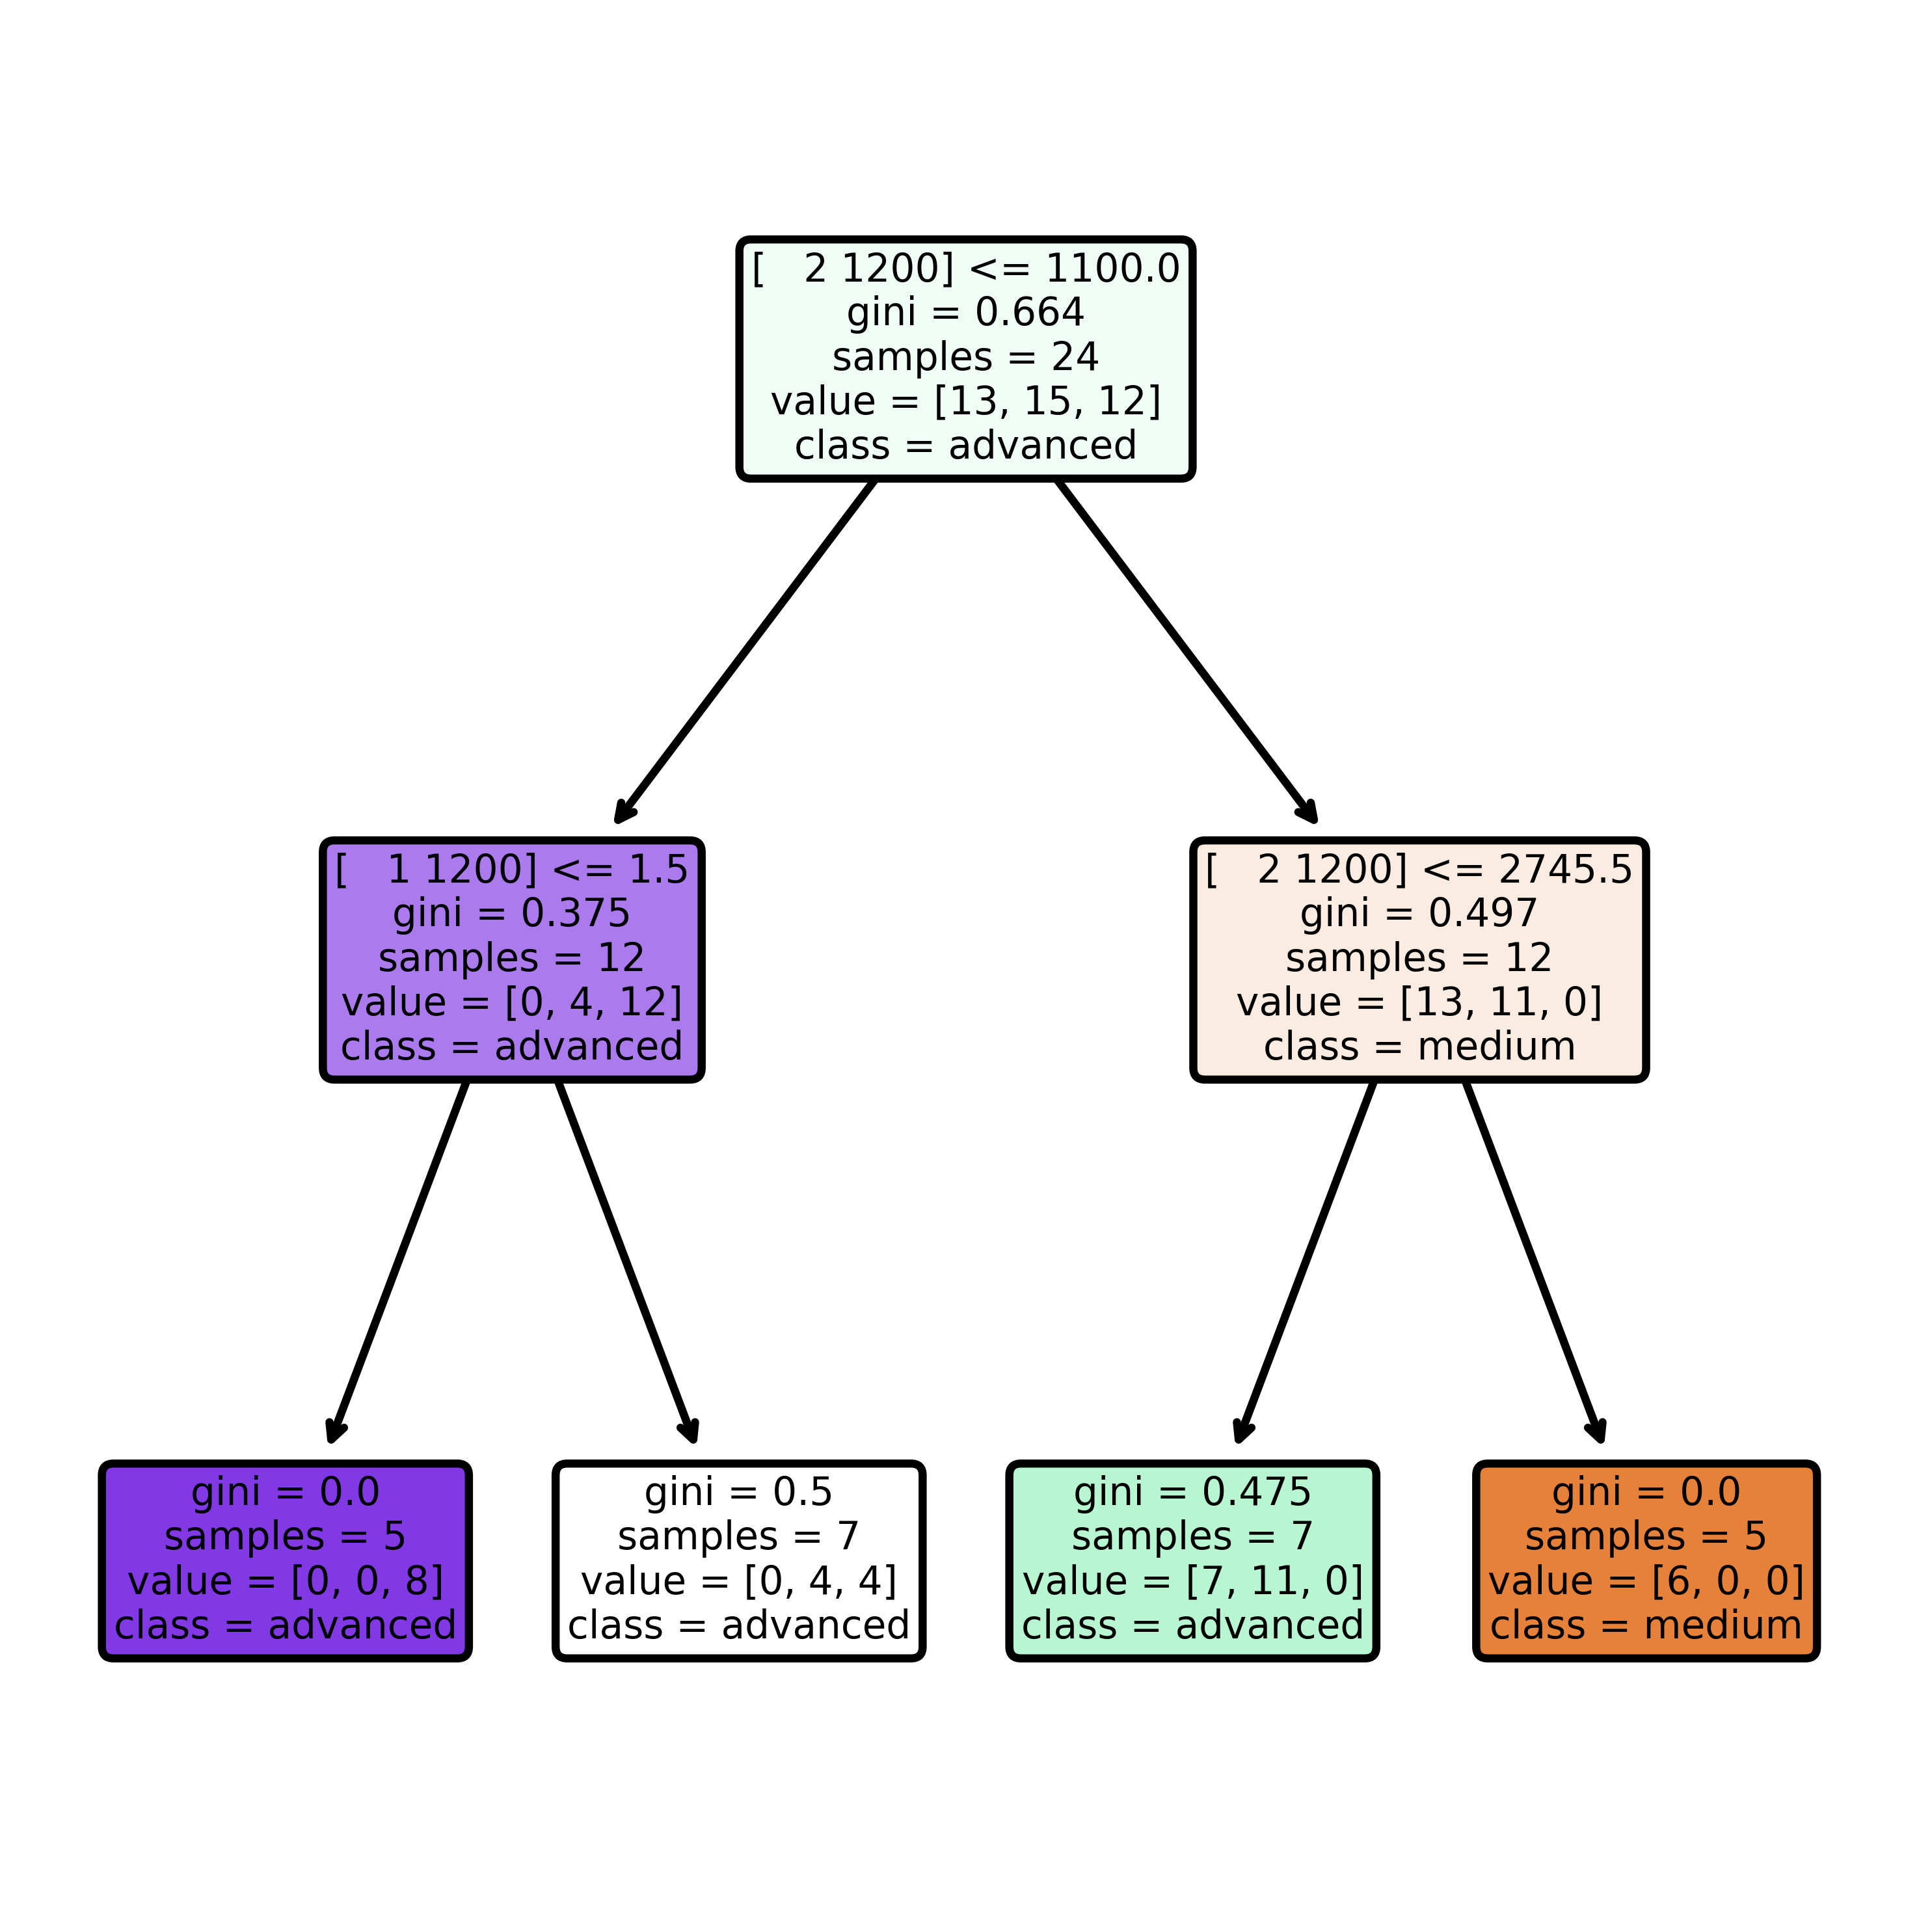

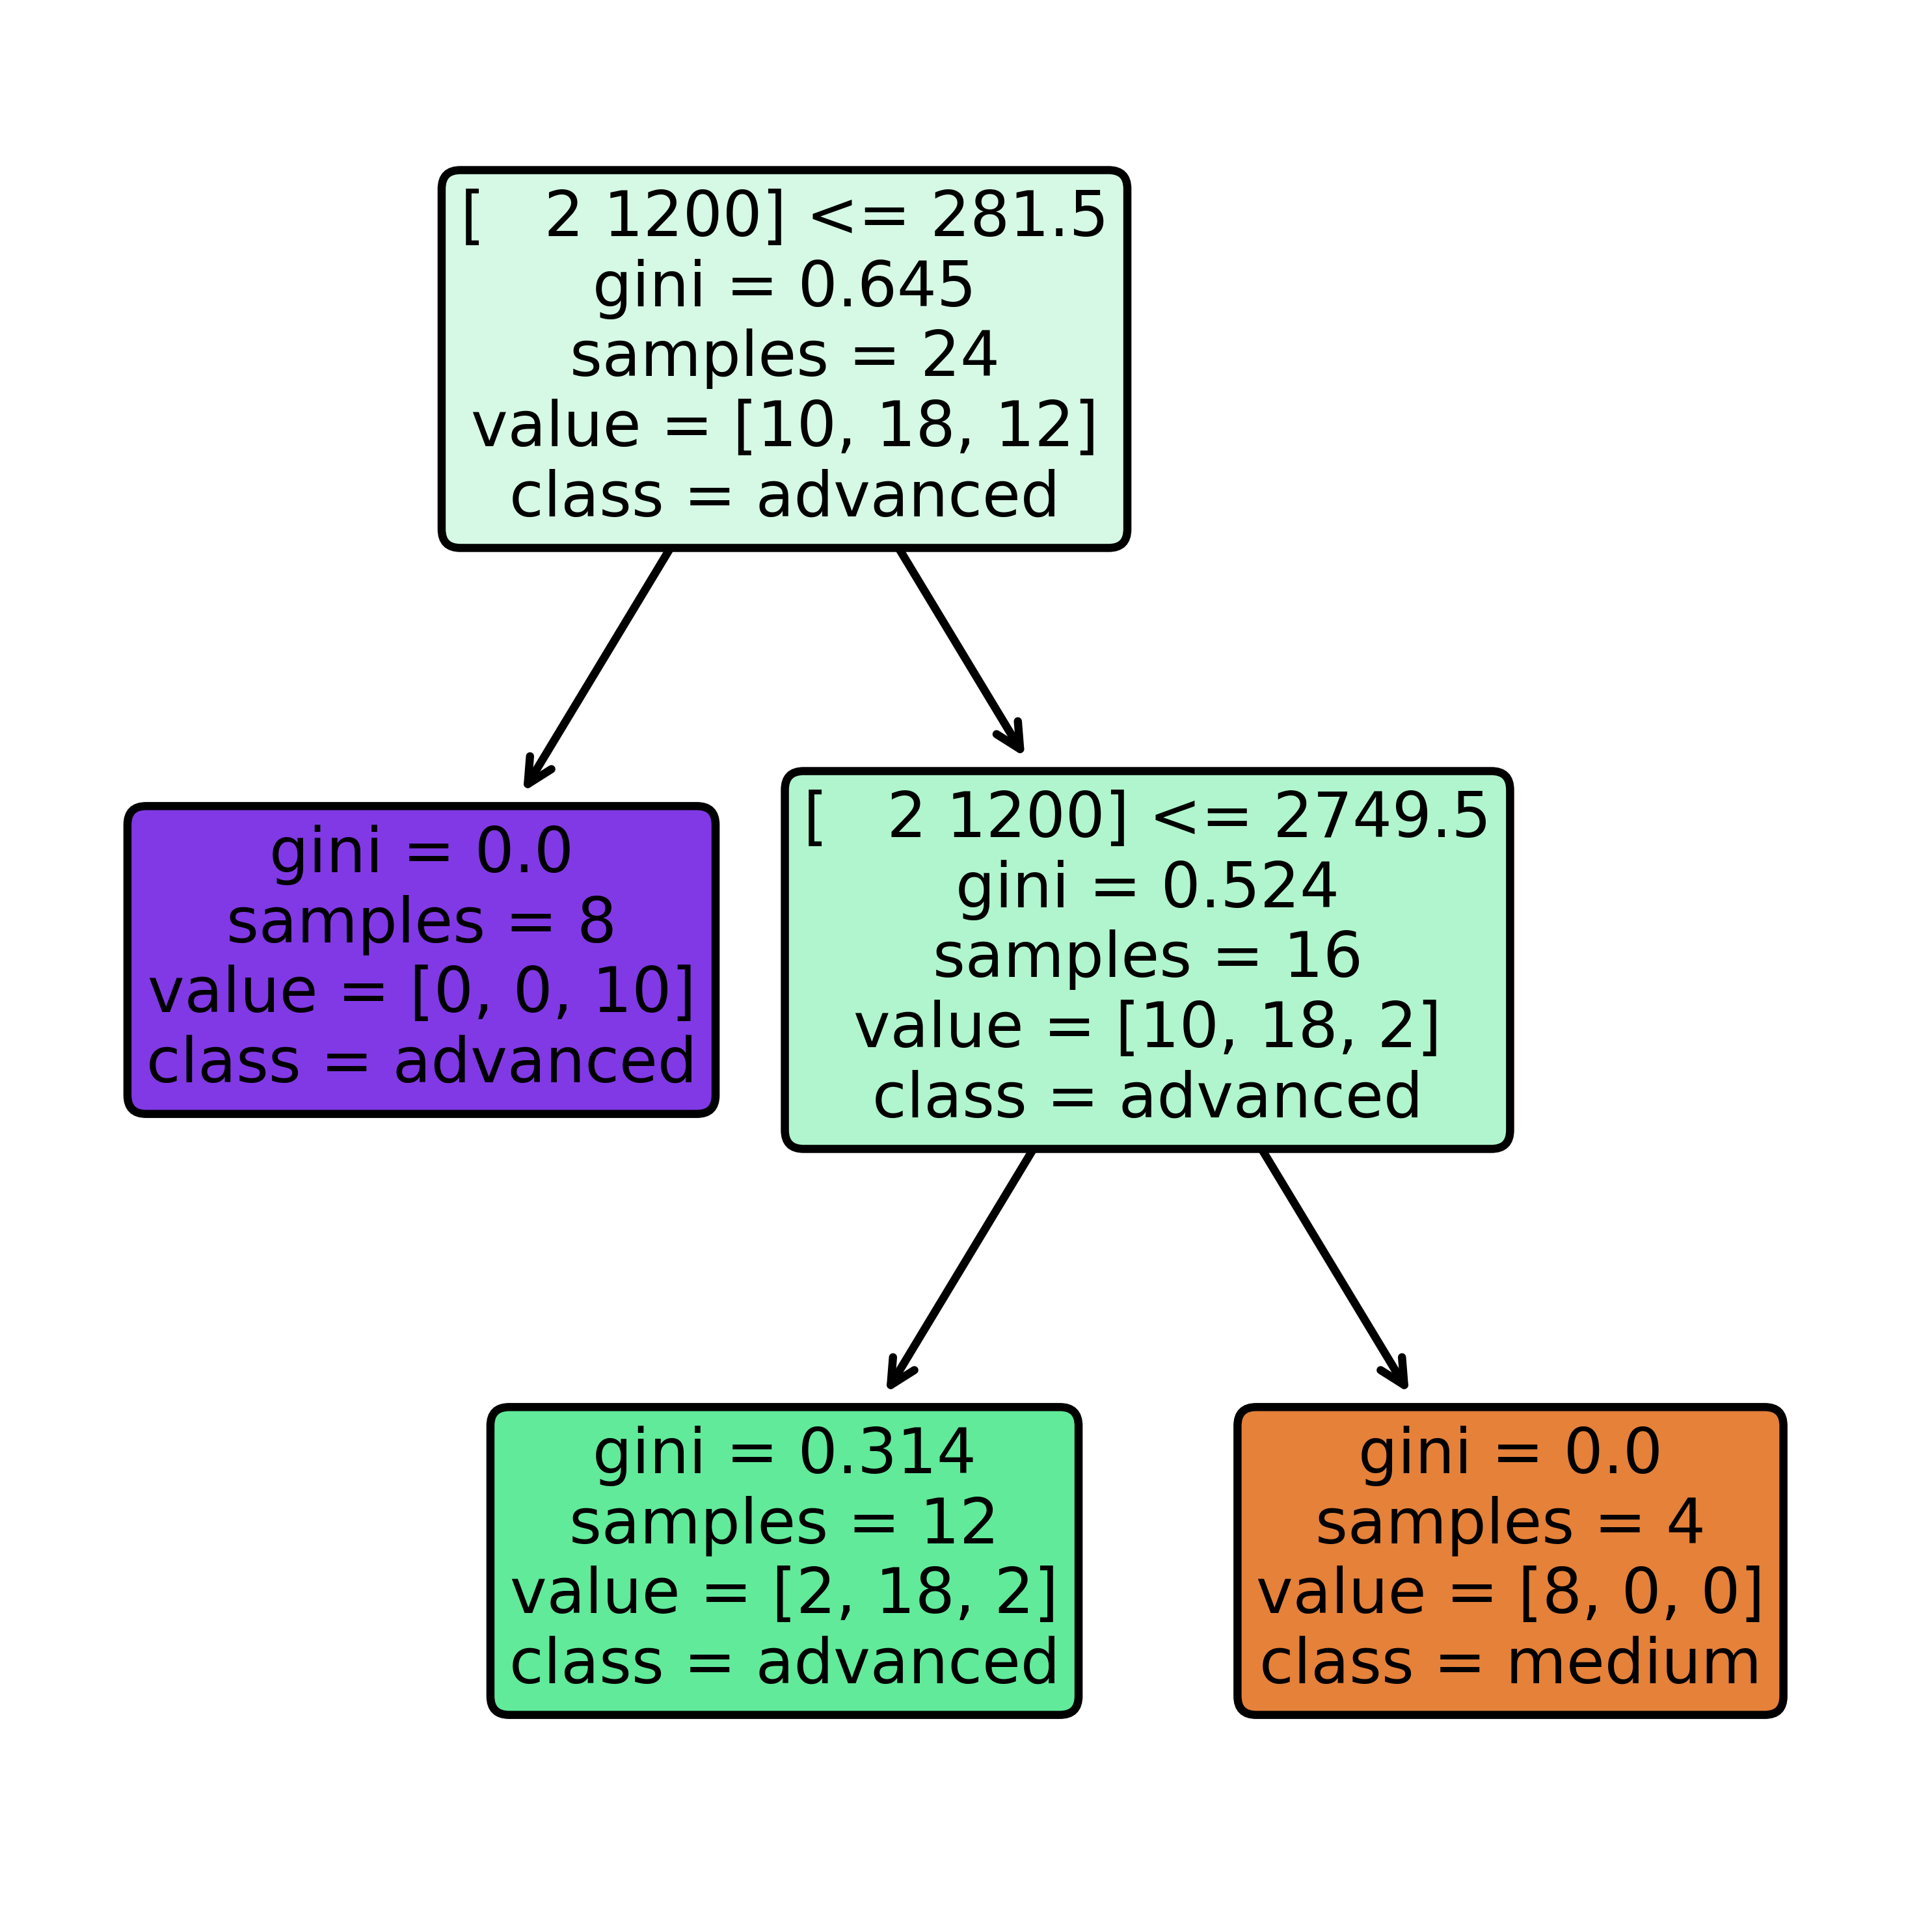

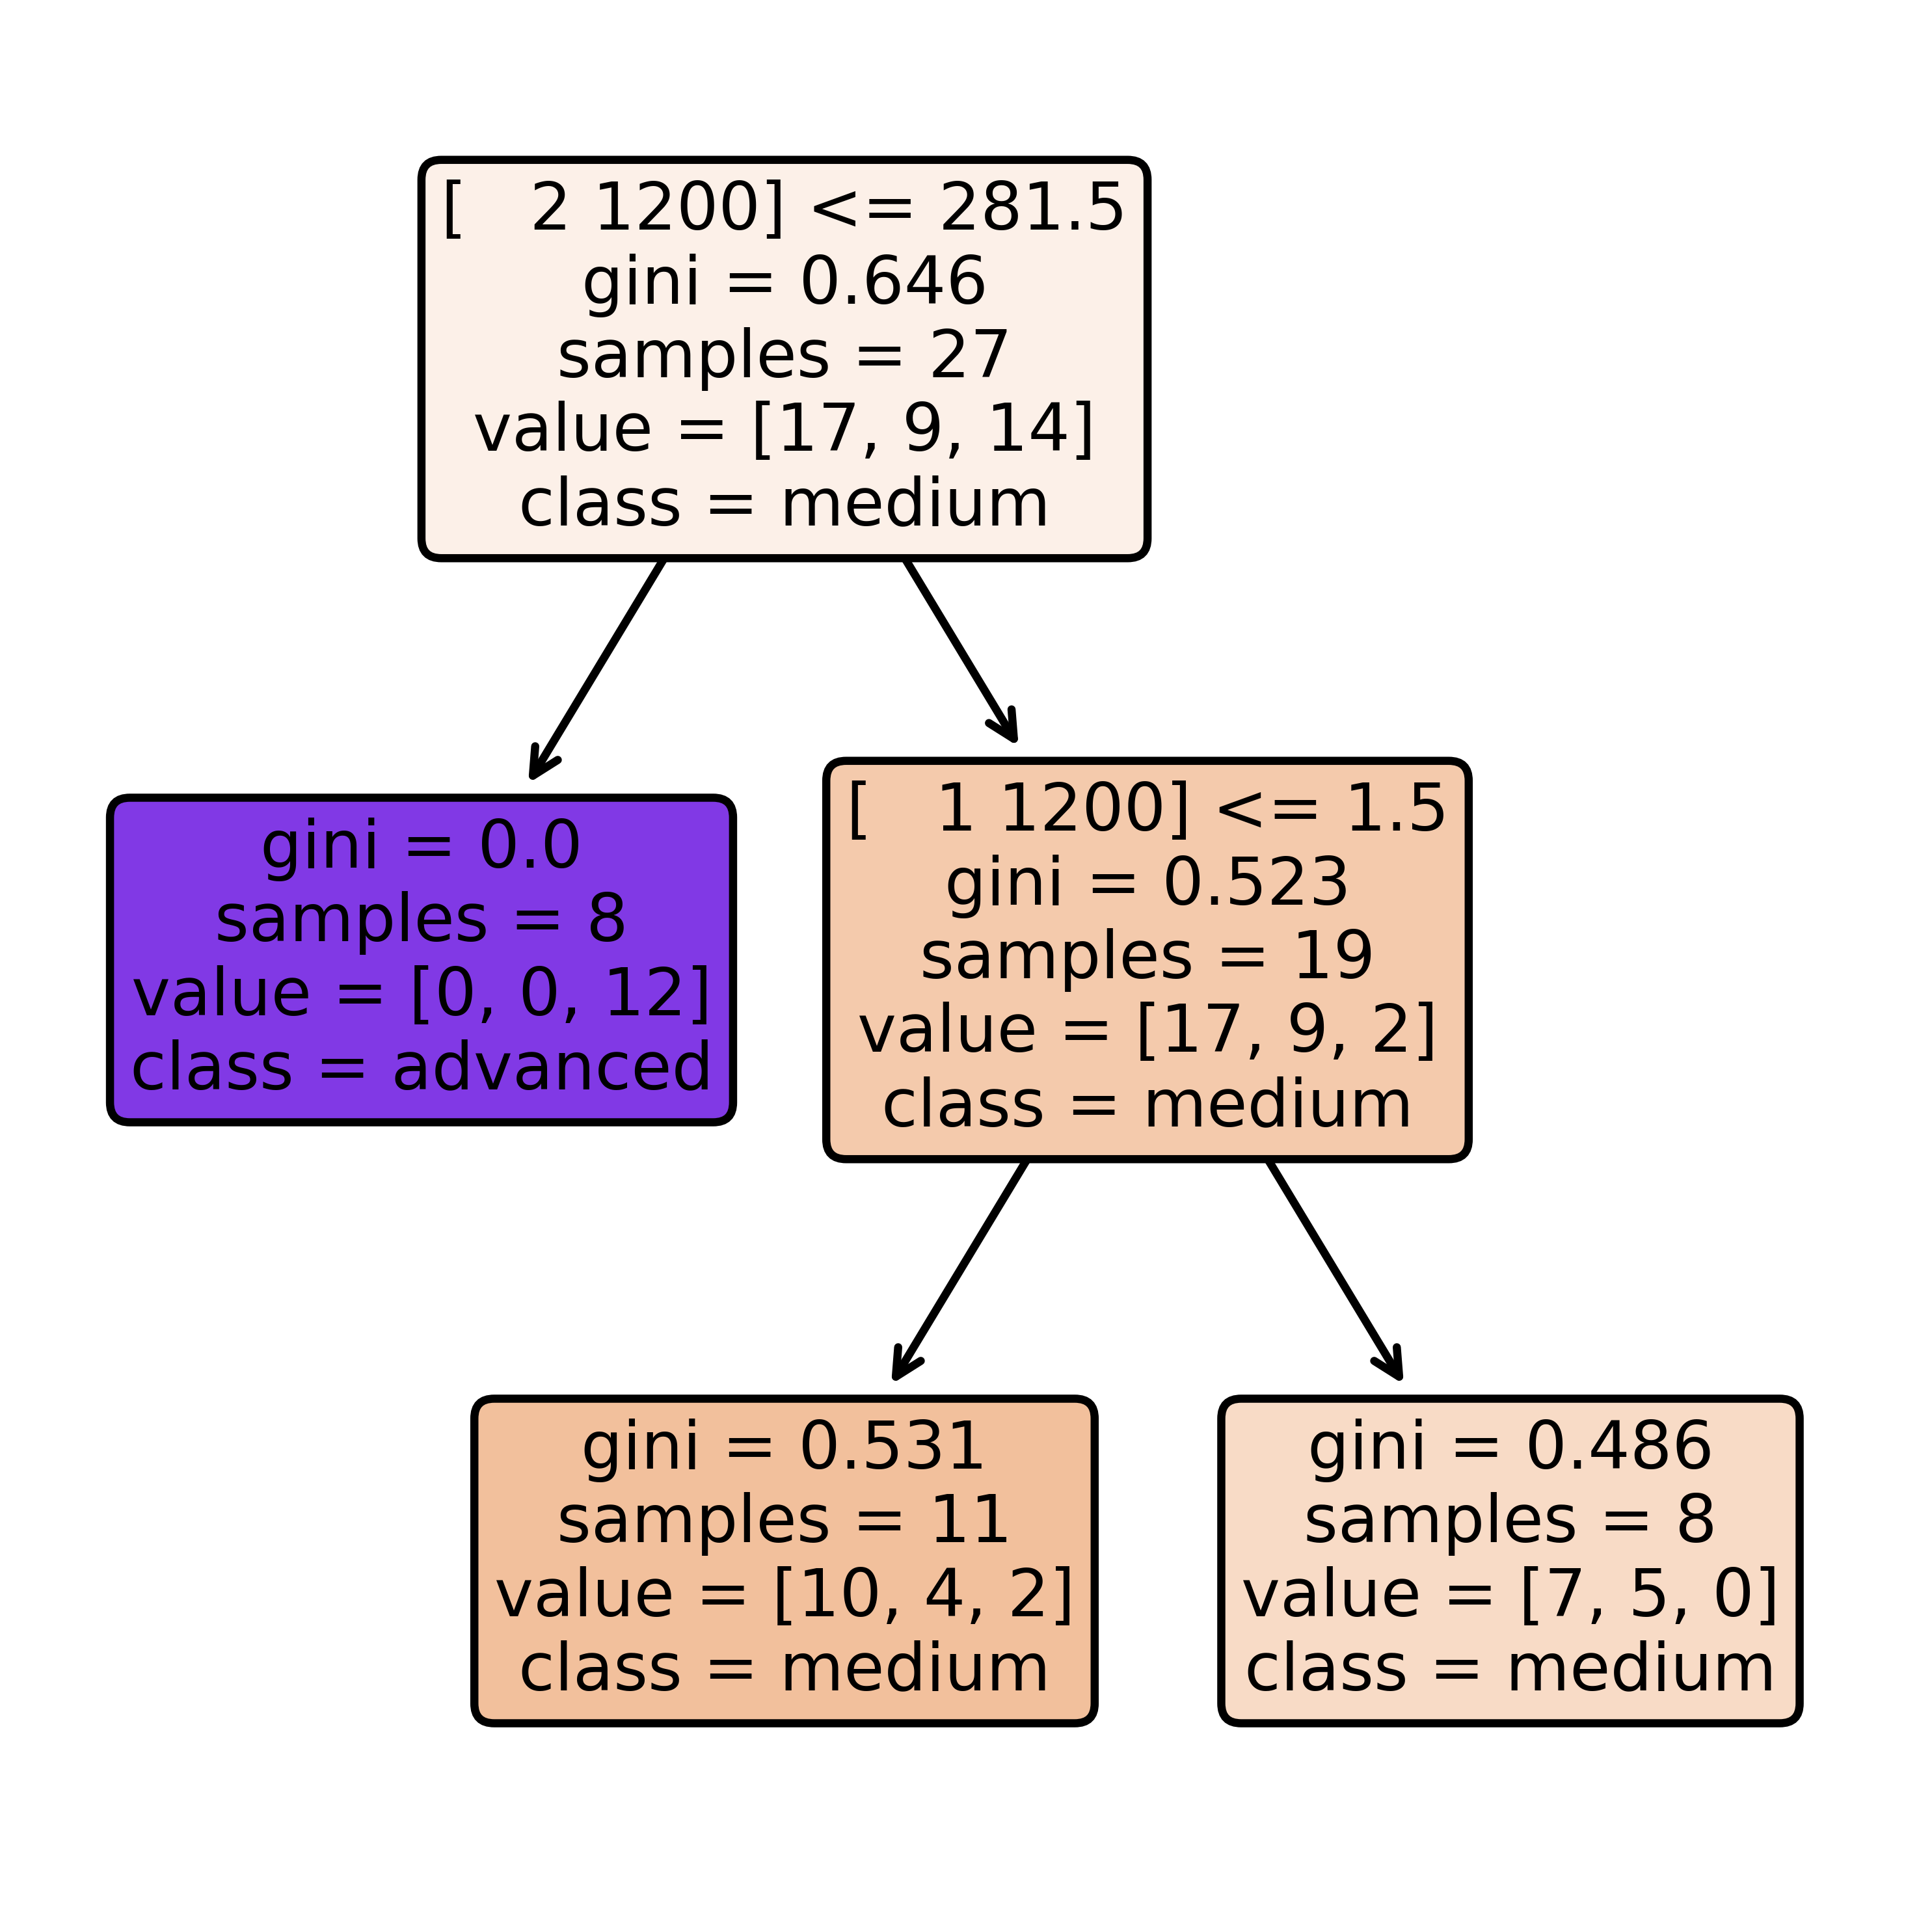

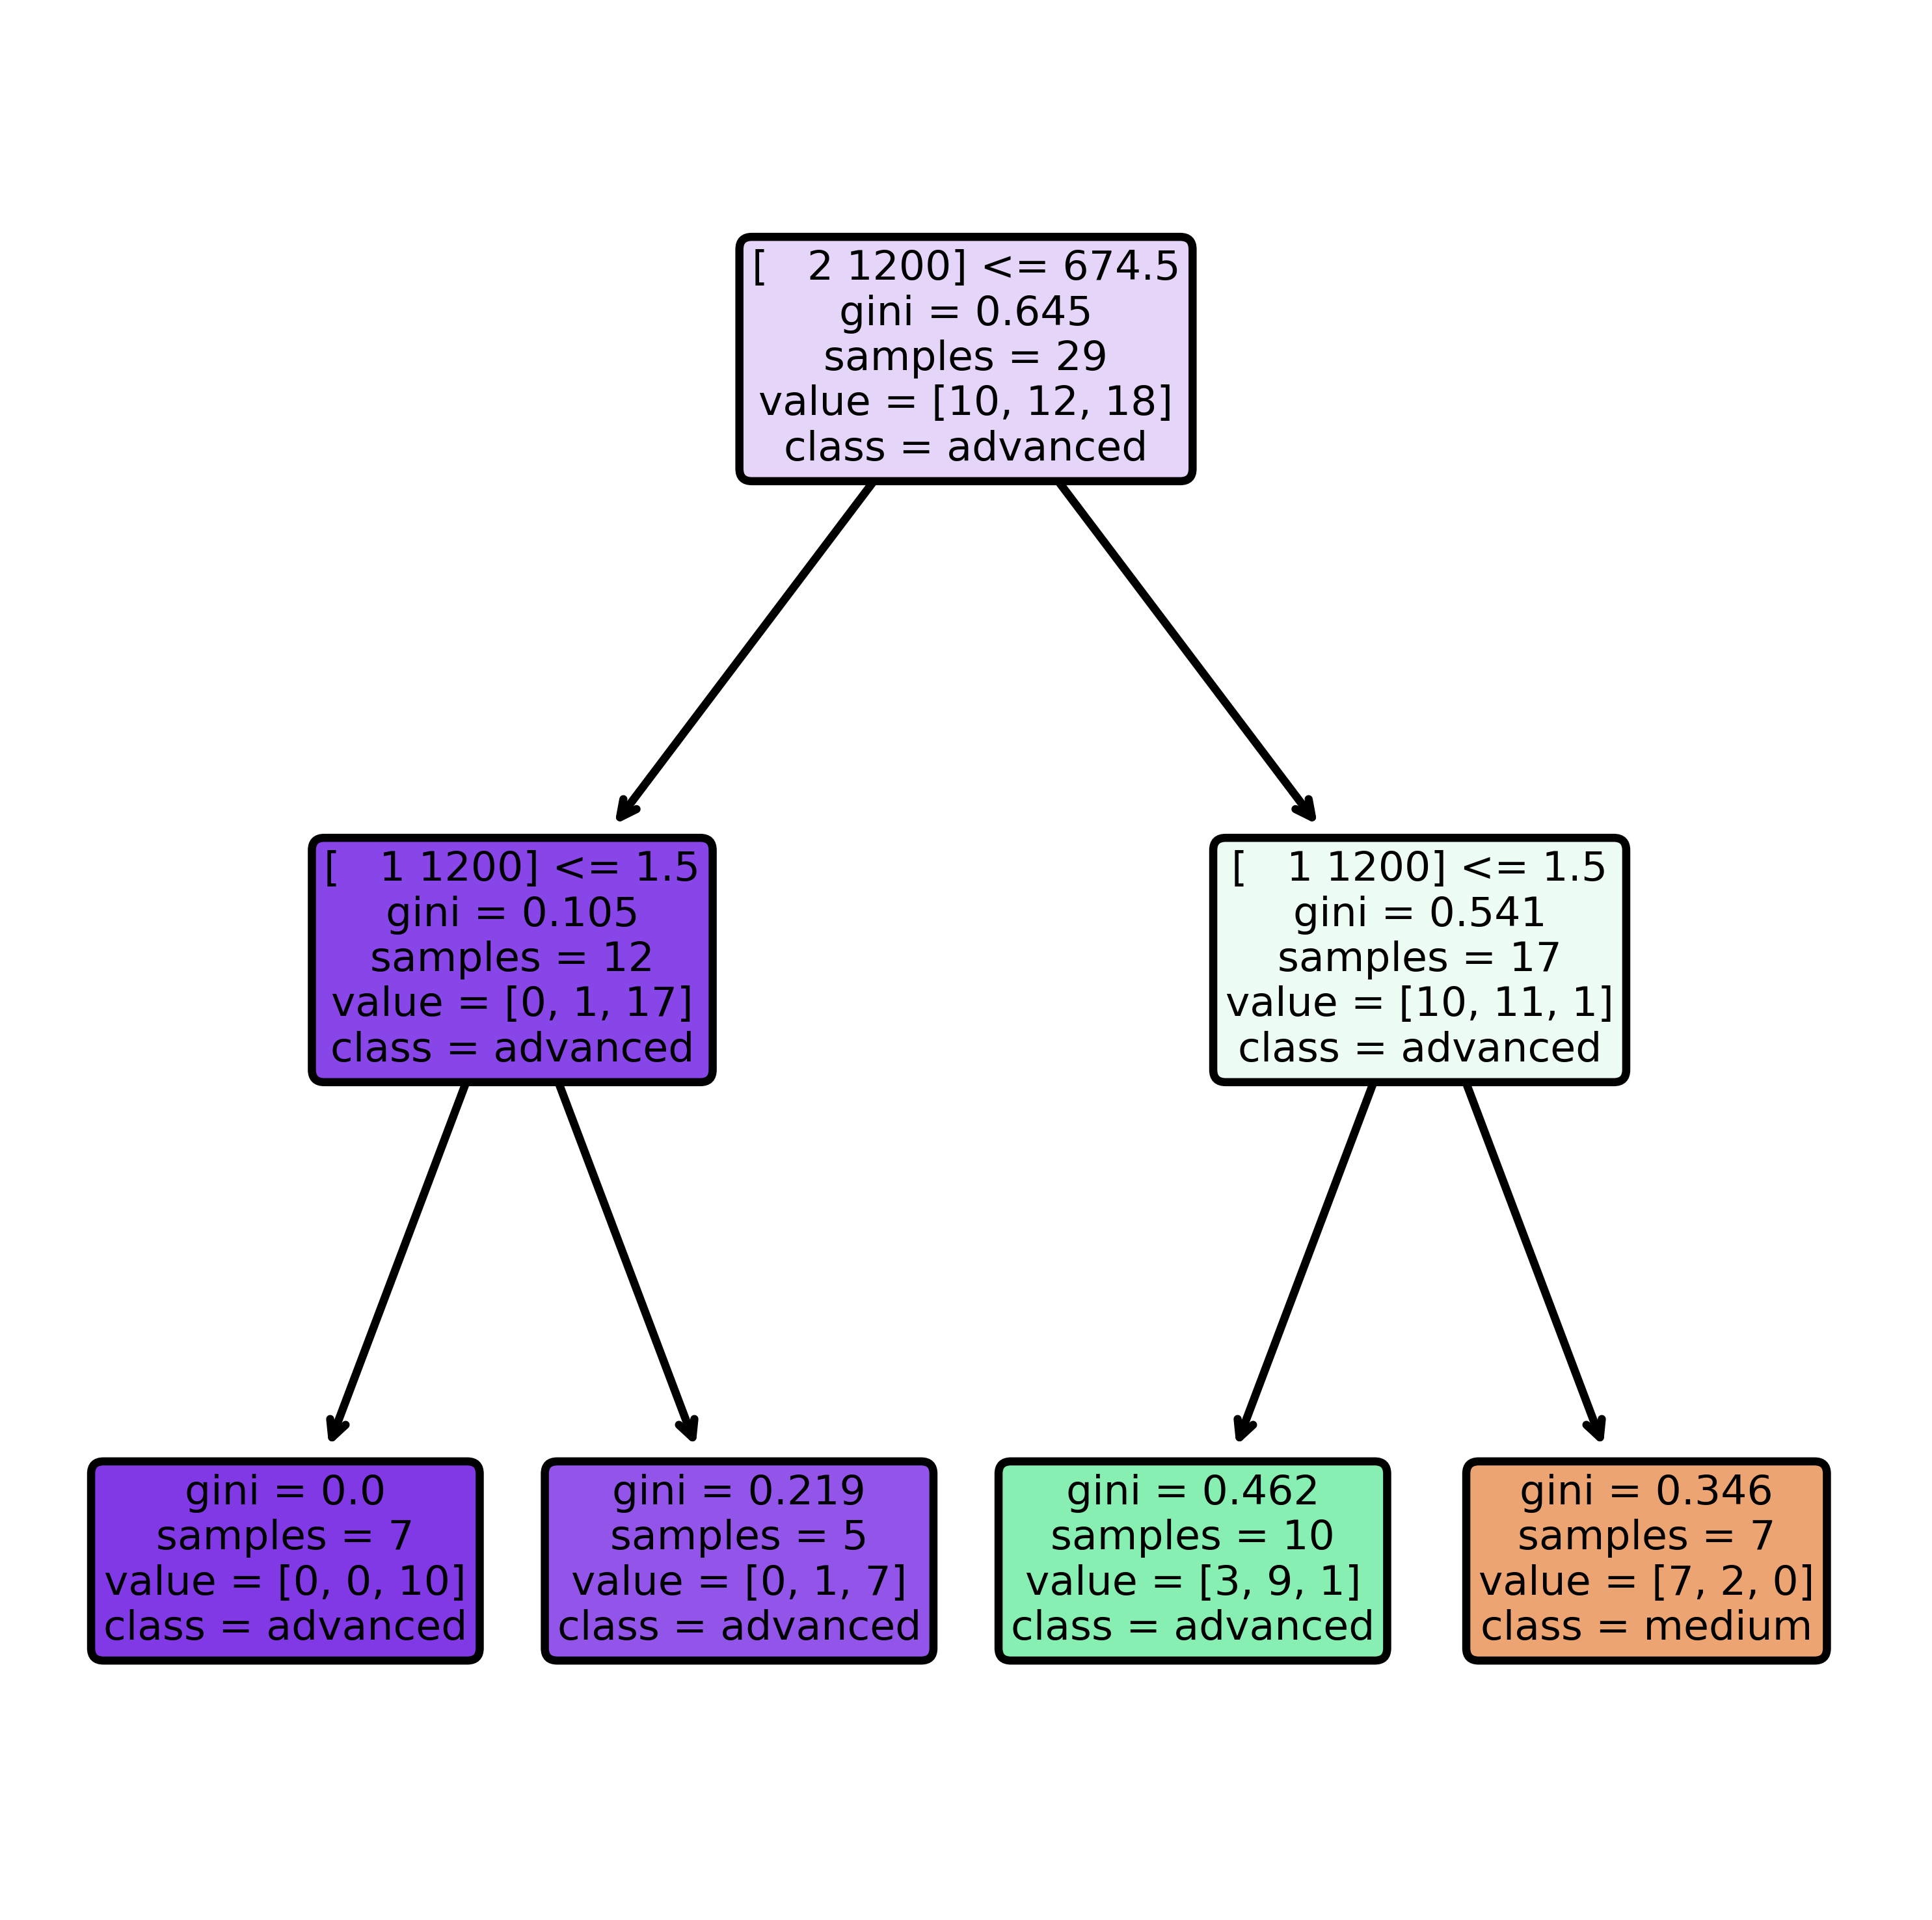

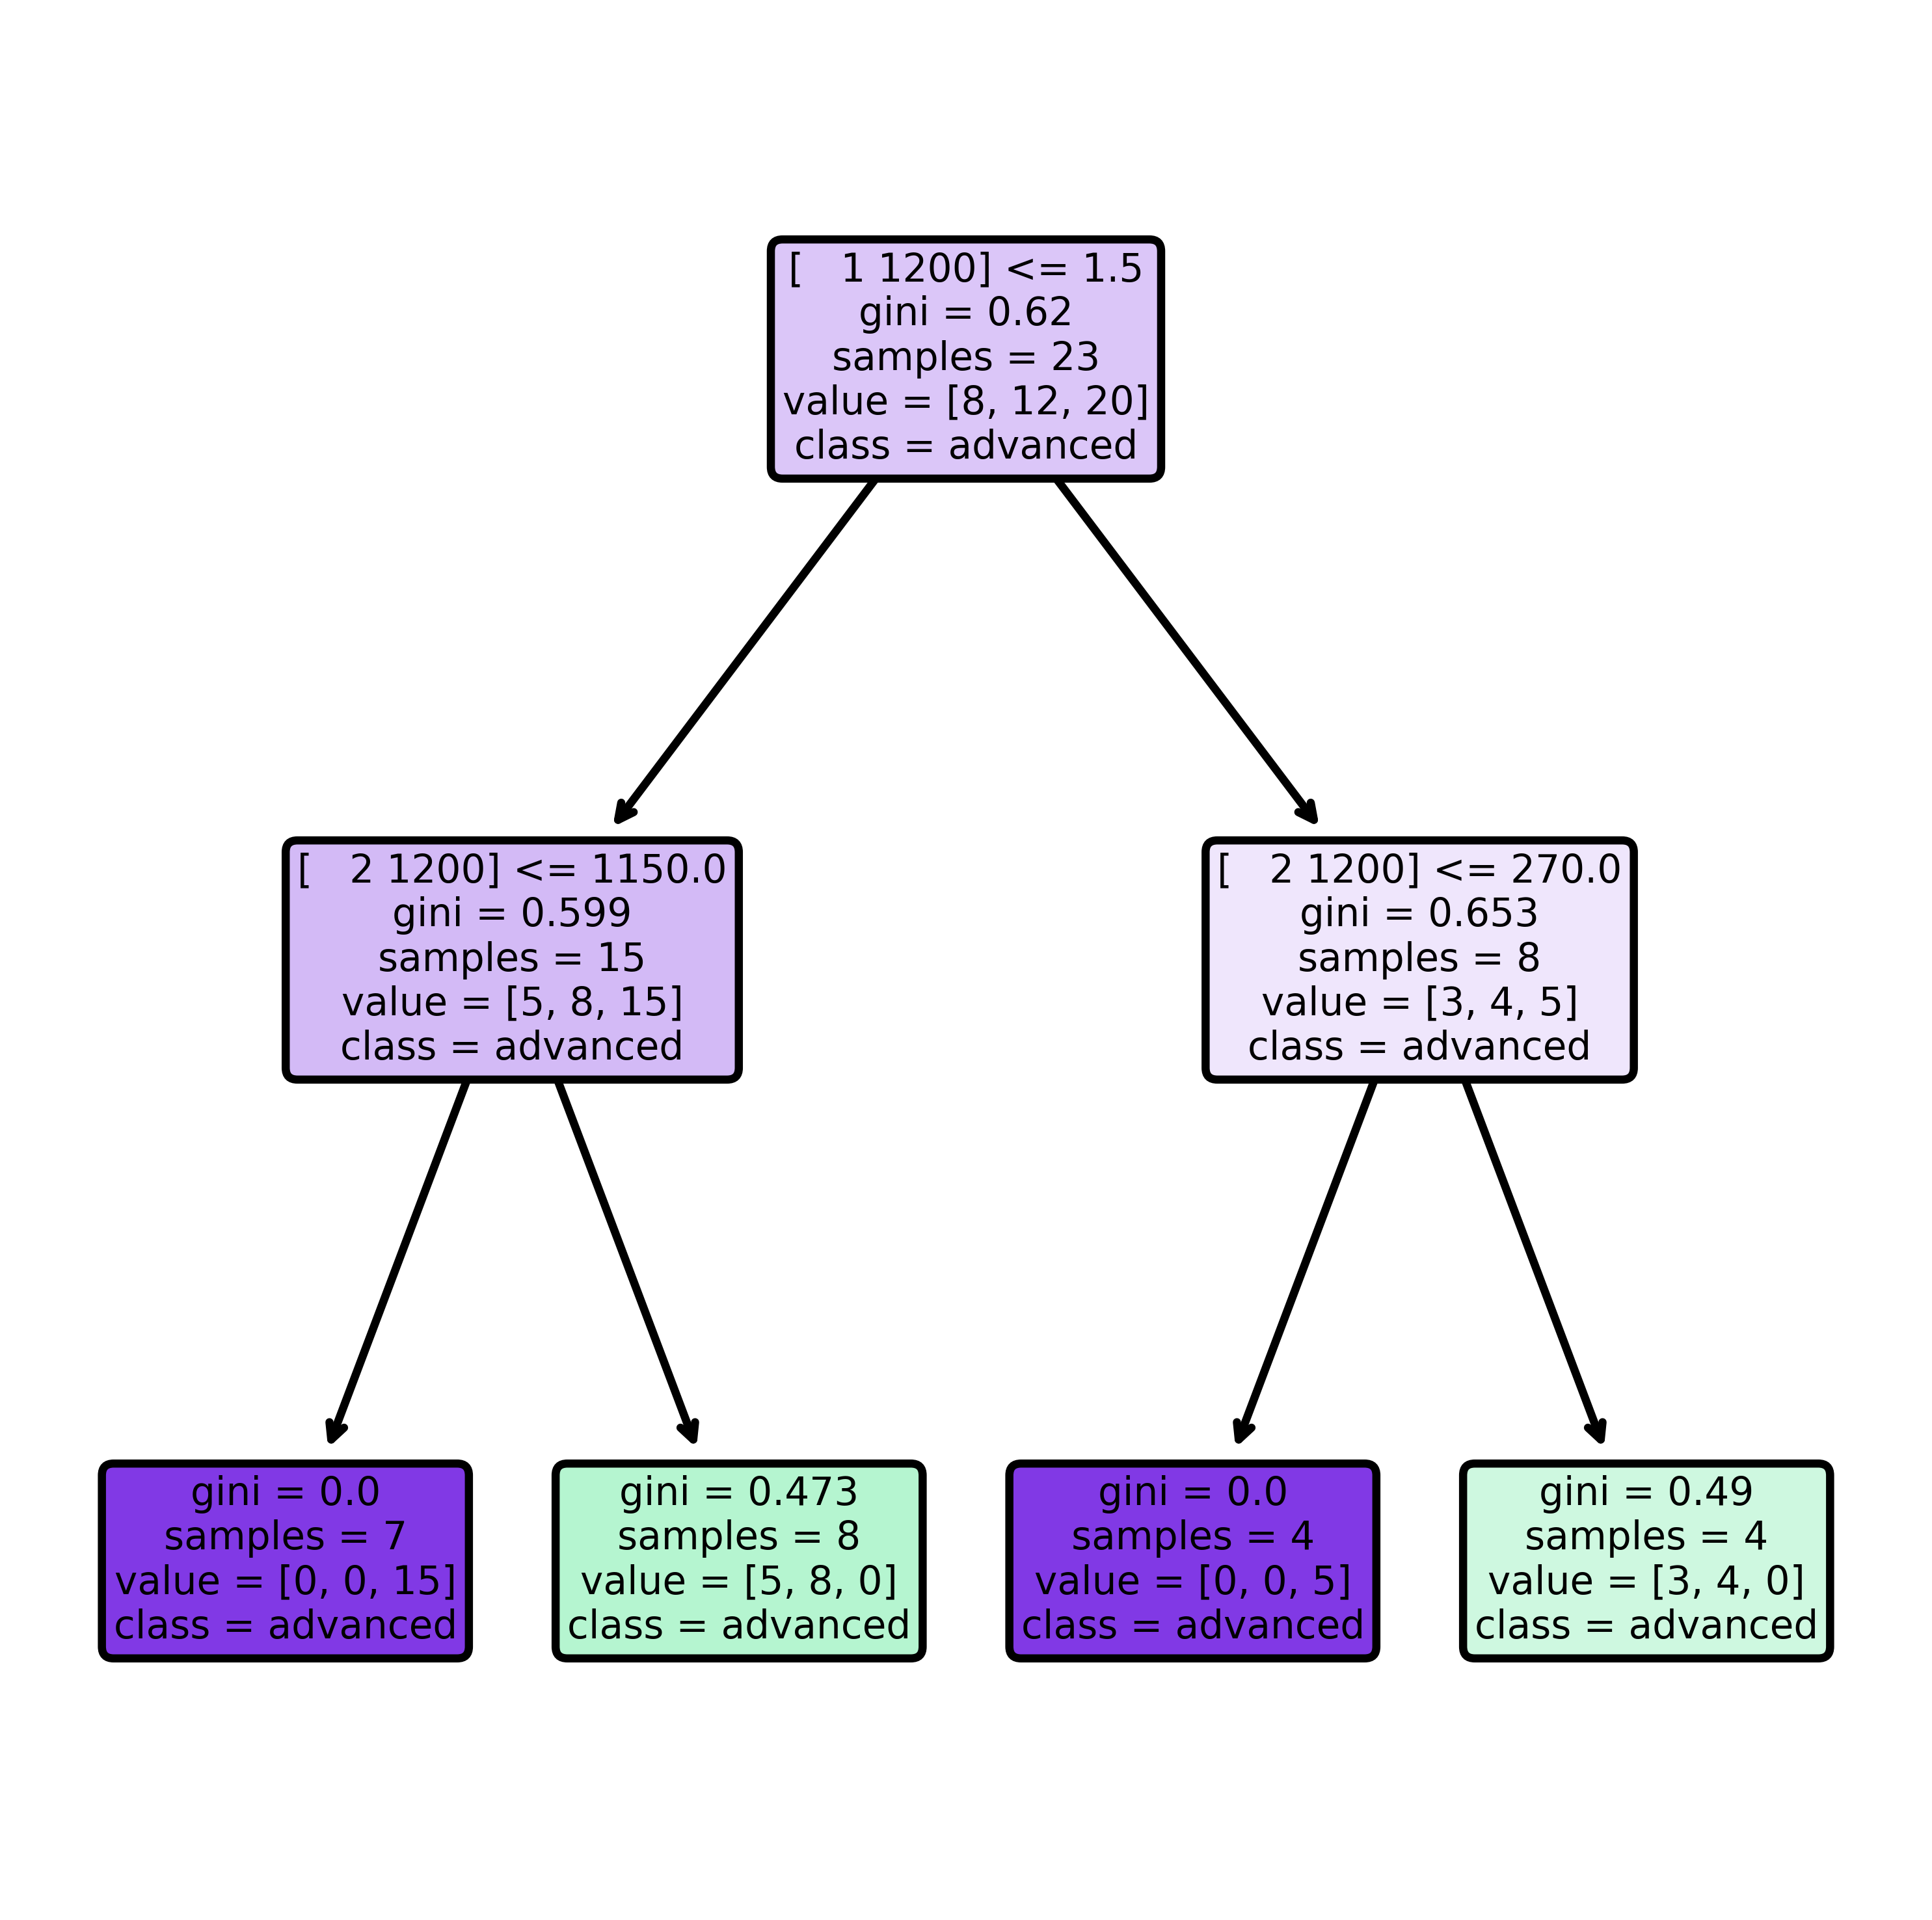

In [29]:
 

for estaminator in classifier.estimators_:     

    feature_names = np.array(X)
    class_names = np.array(y)

    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=900)
    tree.plot_tree(
        estaminator,
        feature_names=feature_names, 
        class_names=class_names,
        filled=True,
        rounded=True
    )
    plt.show()

              precision    recall  f1-score   support

    advanced       1.00      0.50      0.67         2
      medium       0.80      1.00      0.89         4
        weak       1.00      1.00      1.00         4

    accuracy                           0.90        10
   macro avg       0.93      0.83      0.85        10
weighted avg       0.92      0.90      0.89        10



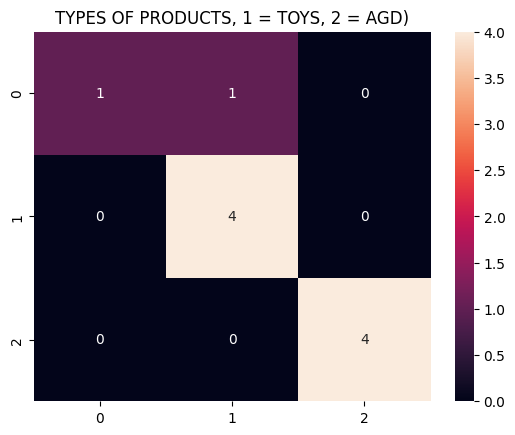

In [30]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('TYPES OF PRODUCTS, 1 = TOYS, 2 = AGD)')

print(classification_report(y_test,y_pred))

In [31]:
pickle.dump(classifier, open("classifier.pkl", "wb"))